# Domanda 9

Discutere i risultati ottenuti per calcolare lo zero della funzione $f(x) = x^3 + 4xcos(x) − 2$ nell’intervallo $[0, 2]$ utilizzando:

- il metodo delle approssimazioni successive con $g(x) = \frac{2−x^3}{4cos(x)}$


- il metodo di Newton

mostrando l’ errore commesso al variare delle iterazioni $(x^∗ ≈ 0.5369)$.

fTrue =  1.436646284158627e-06 

Metodo approssimazioni successive g1 
 x = 0.5368385515614601 
 iter_new= 9 

Metodo Newton 
 x = 0.5368385515583665 
 iter_new= 11 



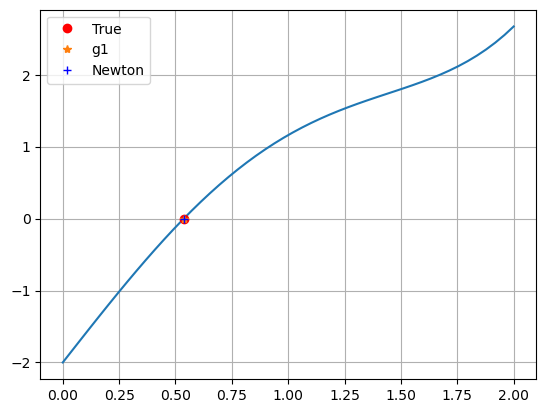

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(f(xTrue)-f(x0))
  x=x0

  while (i<maxit and ((np.abs(f(x))>tolf) or err[i]>tolx)): # scarto assoluto tra iterati
    x_new= g(x)
    err[i+1]= np.abs(x_new-x)
    vecErrore[i+1]=np.abs(f(xTrue)- f(x_new)) 
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 



def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x-f(x)/df(x)
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)


f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*(x**2) + 4*np.sin(x)
g1 = lambda x: (2-x**3)/(4*np.cos(x))


xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue, '\n')

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')
         
        

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0 = 0.4


[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\n')

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\n')

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

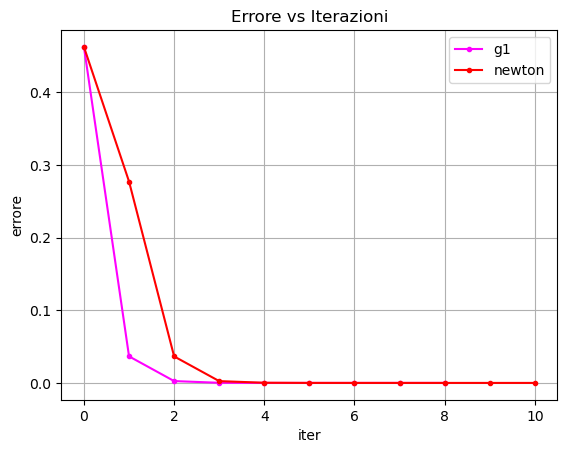

In [18]:
plt.plot(vecErrore_g1, '.-', color='magenta')


plt.plot(vecErrore_newton, '.-', color='red')


plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()